In [1]:
import imblearn
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import tree


from scipy.stats import ks_2samp, mannwhitneyu

In [2]:
df = pd.read_csv("contributors2.csv")
df
selected_columns = ['name_with_owner','is_core', 'issues', 'prs', 'pr_comments_self', 'pr_comments_others', 
                    'issues_comments_self', 'issues_comments_others', 'pr_reactions_self', 'pr_reactions_others', 
                    'issues_reactions_self', 'issues_reactions_others', 'issue_hours_to_respond_reaction', 
                    'pr_hours_to_respond_reaction', 'issue_hours_to_respond_comment', 'pr_hours_to_respond_comment',
                    'days_to_close_issue', 'days_to_close_pr']

pred_cols = ['issues', 'prs', 'pr_comments_self', 'pr_comments_others', 
                    'issues_comments_self', 'issues_comments_others', 'pr_reactions_self', 'pr_reactions_others', 
                    'issues_reactions_self', 'issues_reactions_others', 'issue_hours_to_respond_reaction', 
                    'pr_hours_to_respond_reaction', 'issue_hours_to_respond_comment', 'pr_hours_to_respond_comment',
                    'days_to_close_issue', 'days_to_close_pr']

# Subset the DataFrame based on the selected columns
c3 = df[selected_columns].copy()
c3 = c3.drop(columns = 'name_with_owner')




'''# Subset the DataFrame based on the selected columns
c3 = df[selected_columns].copy()
#get projects not in cluster
c3_cols = ['umijs/umi', 'netbox-community/netbox', 'grafana/loki', 'awsdocs/aws-doc-sdk-examples', 'vueuse/vueuse',
     'yuzu-emu/yuzu', 'TanStack/query', 'lvgl/lvgl', 'arendst/Tasmota', 'Aircoookie/WLED']
#combine into one list
c3 = c3[c3['name_with_owner'].isin(c3_cols)]
c3 = c3.drop(columns = 'name_with_owner')'''

"# Subset the DataFrame based on the selected columns\nc3 = df[selected_columns].copy()\n#get projects not in cluster\nc3_cols = ['umijs/umi', 'netbox-community/netbox', 'grafana/loki', 'awsdocs/aws-doc-sdk-examples', 'vueuse/vueuse',\n     'yuzu-emu/yuzu', 'TanStack/query', 'lvgl/lvgl', 'arendst/Tasmota', 'Aircoookie/WLED']\n#combine into one list\nc3 = c3[c3['name_with_owner'].isin(c3_cols)]\nc3 = c3.drop(columns = 'name_with_owner')"

In [3]:
df.columns

Index(['name_with_owner', 'login', 'url', 'type', 'admin', 'contributions',
       'commits', 'core_qty', 'core_time', 'is_core', 'issues', 'prs',
       'pr_comments_self', 'pr_comments_others', 'issues_comments_self',
       'issues_comments_others', 'pr_reactions_self', 'pr_reactions_others',
       'issues_reactions_self', 'issues_reactions_others',
       'issue_hours_to_respond_reaction', 'pr_hours_to_respond_reaction',
       'issue_hours_to_respond_comment', 'pr_hours_to_respond_comment',
       'days_to_close_issue', 'days_to_close_pr', 'login-2', 'bio', 'repos',
       'gists', 'followers', 'following', 'created', 'months_experience',
       'has_bio'],
      dtype='object')

In [4]:
c3

is_core  issues  prs  pr_comments_self  pr_comments_others  \
0           0       0    1                 3                   0   
1           0       1    2                 3                   1   
2           0       0    5                17                   0   
3           0       0    3                 4                   0   
4           0       3    4                 9                   2   
...       ...     ...  ...               ...                 ...   
8439        0       1    1                 1                   0   
8440        0      21    1                 0                   0   
8441        0       0    1                 1                   0   
8442        0       0    1                 2                   0   
8443        0       0    1                 0                   0   

      issues_comments_self  issues_comments_others  pr_reactions_self  \
0                        0                       0                  0   
1                        2                       0                  0   
2                        0                       0                  0   
3                        0                       0                  0   
4                        1                       0                  2   
...                    ...                     ...                ...   
8439                     2                       0                  0   
8440                    60                       0                  0   
8441                     0                       0                  0   
8442                     0                       0                  0   
8443                     0                       1                  0   

      pr_reactions_others  issues_reactions_self  issues_reactions_others  \
0                       0                      0                        0   
1                       1                      0                        0   
2                       0                      0                        0   
3                       0                      0                        0   
4                       0                      2                        5   
...                   ...                    ...                      ...   
8439                    0                      0                        0   
8440                    0                      1                        0   
8441                    0                      0                        0   
8442                    0                      0                        0   
8443                    0                      0                        0   

      issue_hours_to_respond_reaction  pr_hours_to_respond_reaction  \
0                               0.000                         0.000   
1                               0.000                         0.242   
2                               0.000                         0.000   
3                               0.000                         0.000   
4                            4099.324                         0.000   
...                               ...                           ...   
8439                            0.000                         0.000   
8440                            0.000                         0.000   
8441                            0.000                         0.000   
8442                            0.000                         0.000   
8443                            0.000                         0.000   

      issue_hours_to_respond_comment  pr_hours_to_respond_comment  \
0                              0.000                        0.000   
1                              0.000                       20.260   
2                              0.000                        0.000   
3                              0.000                        0.000   
4                              0.000                       80.227   
...                              ...                          ...   
8439                           0.000               

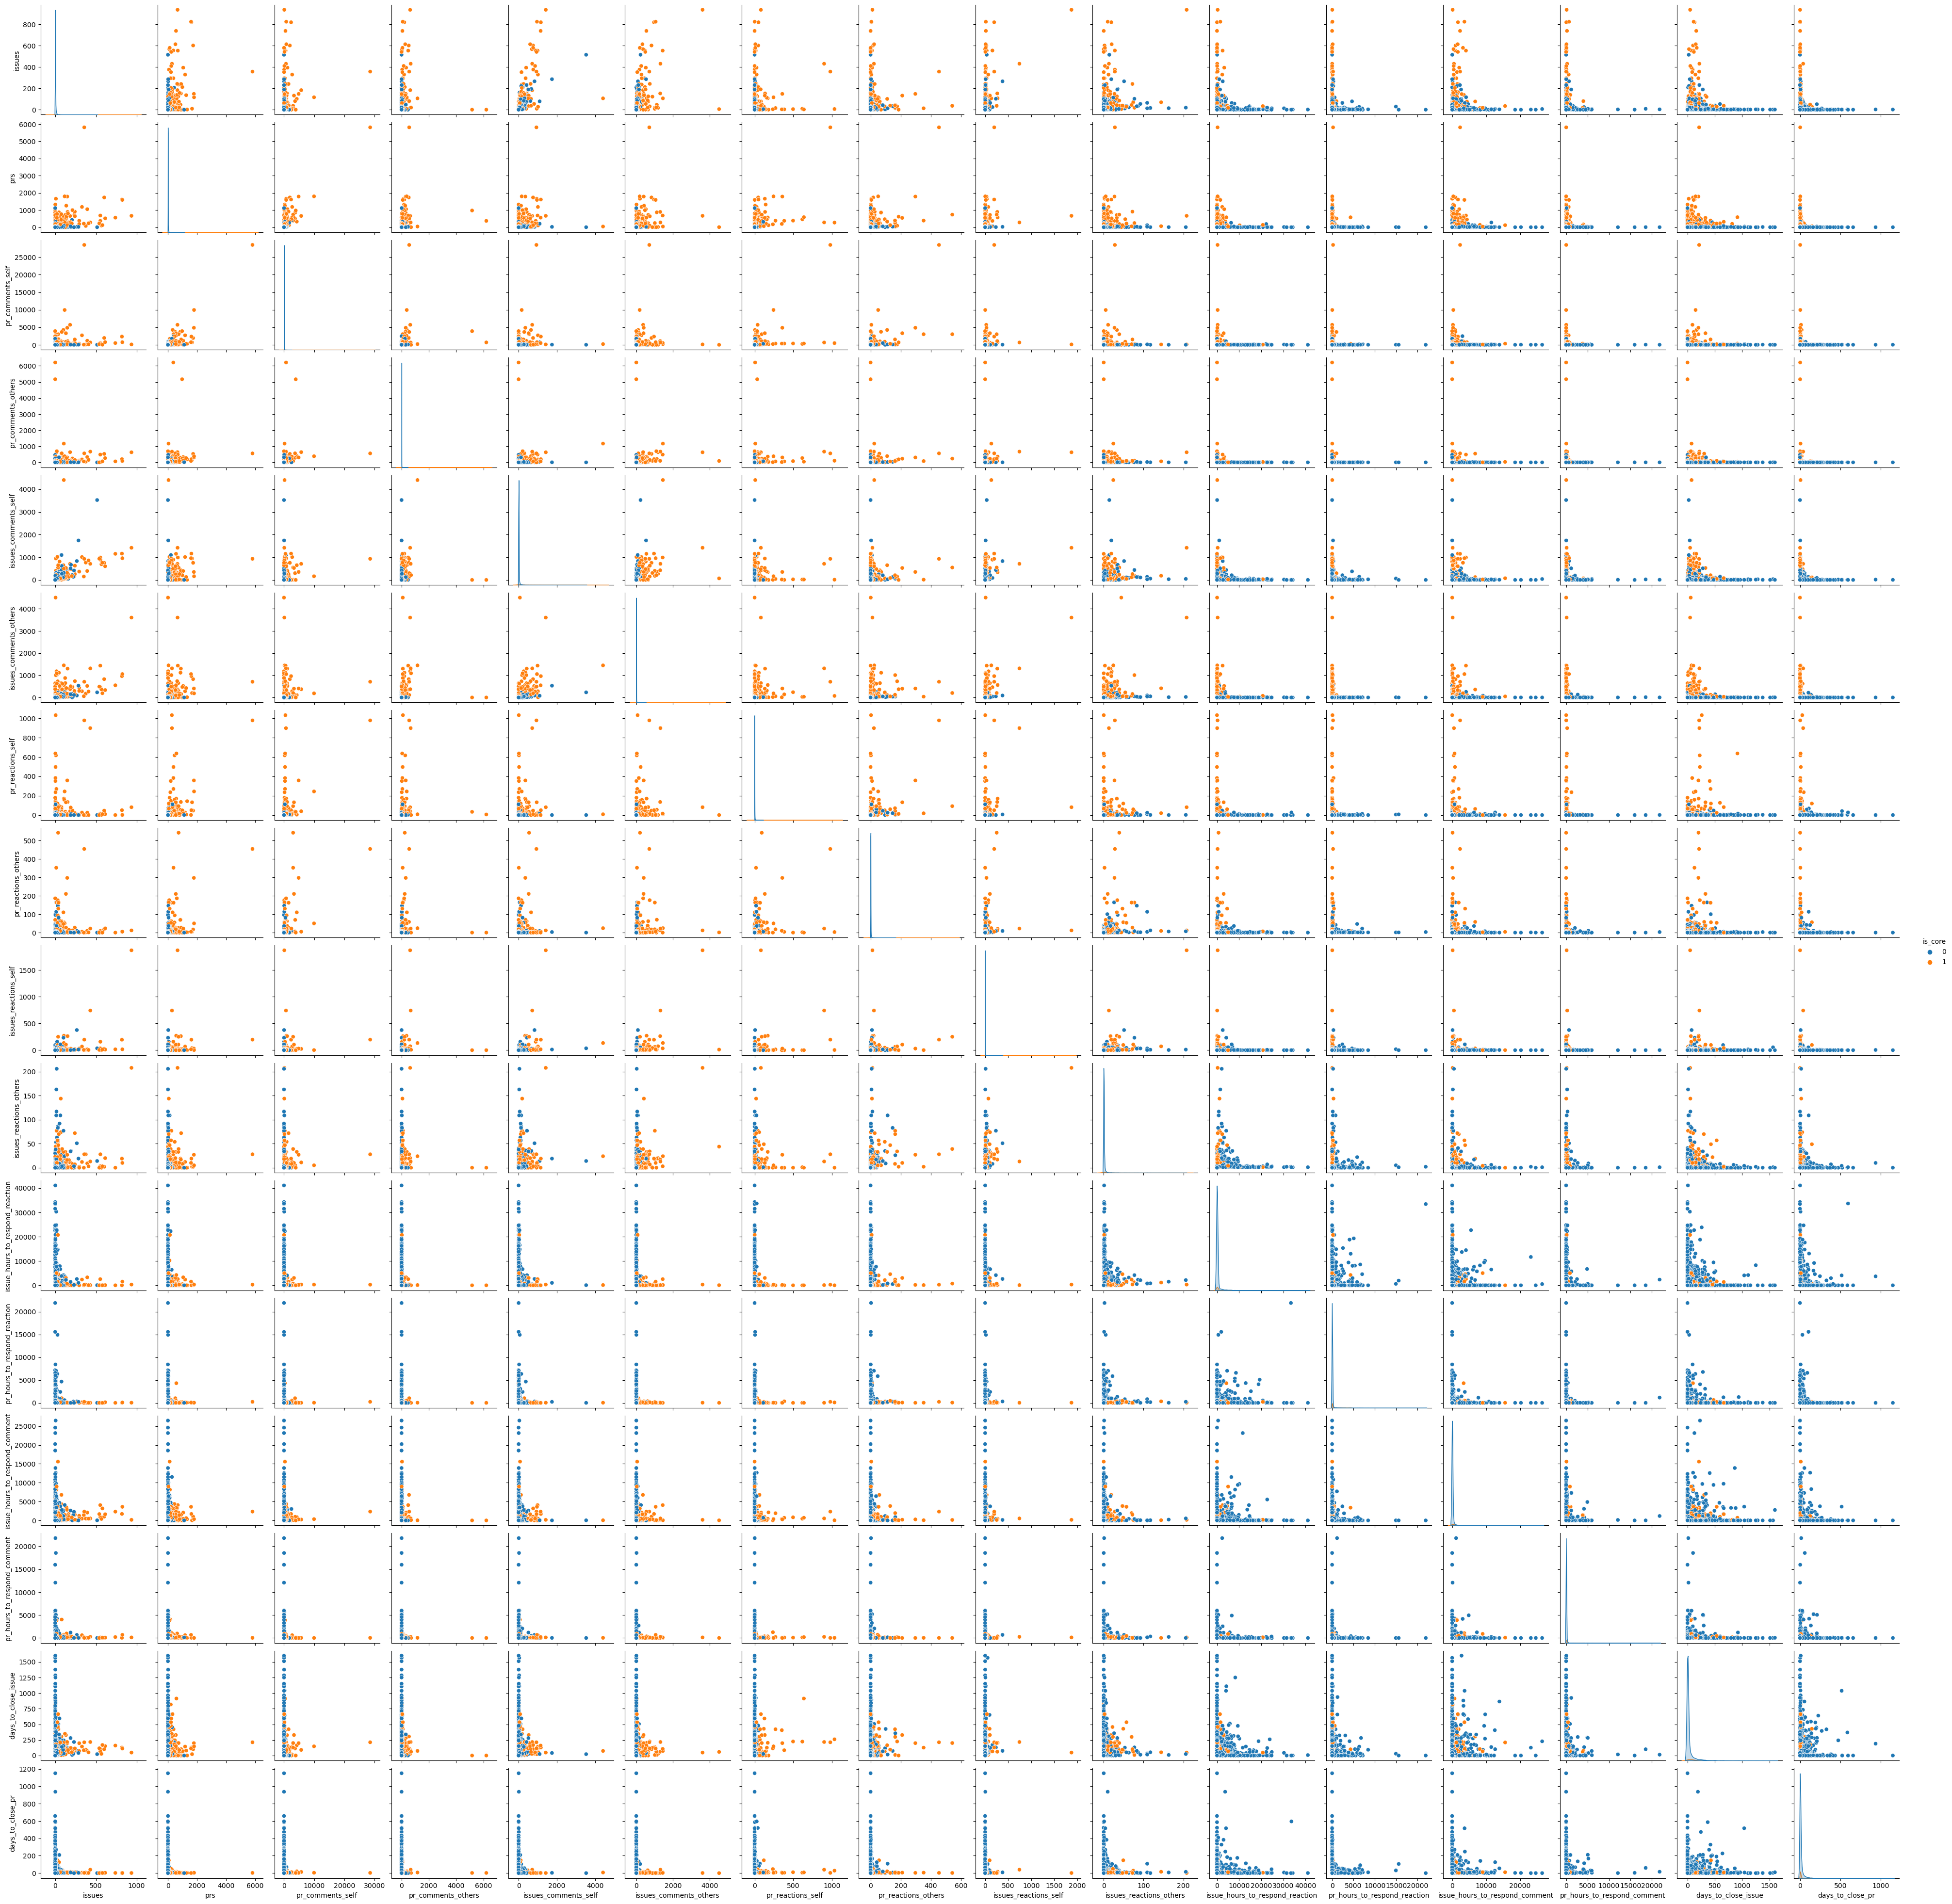

In [5]:
sns.pairplot(c3, hue = 'is_core')

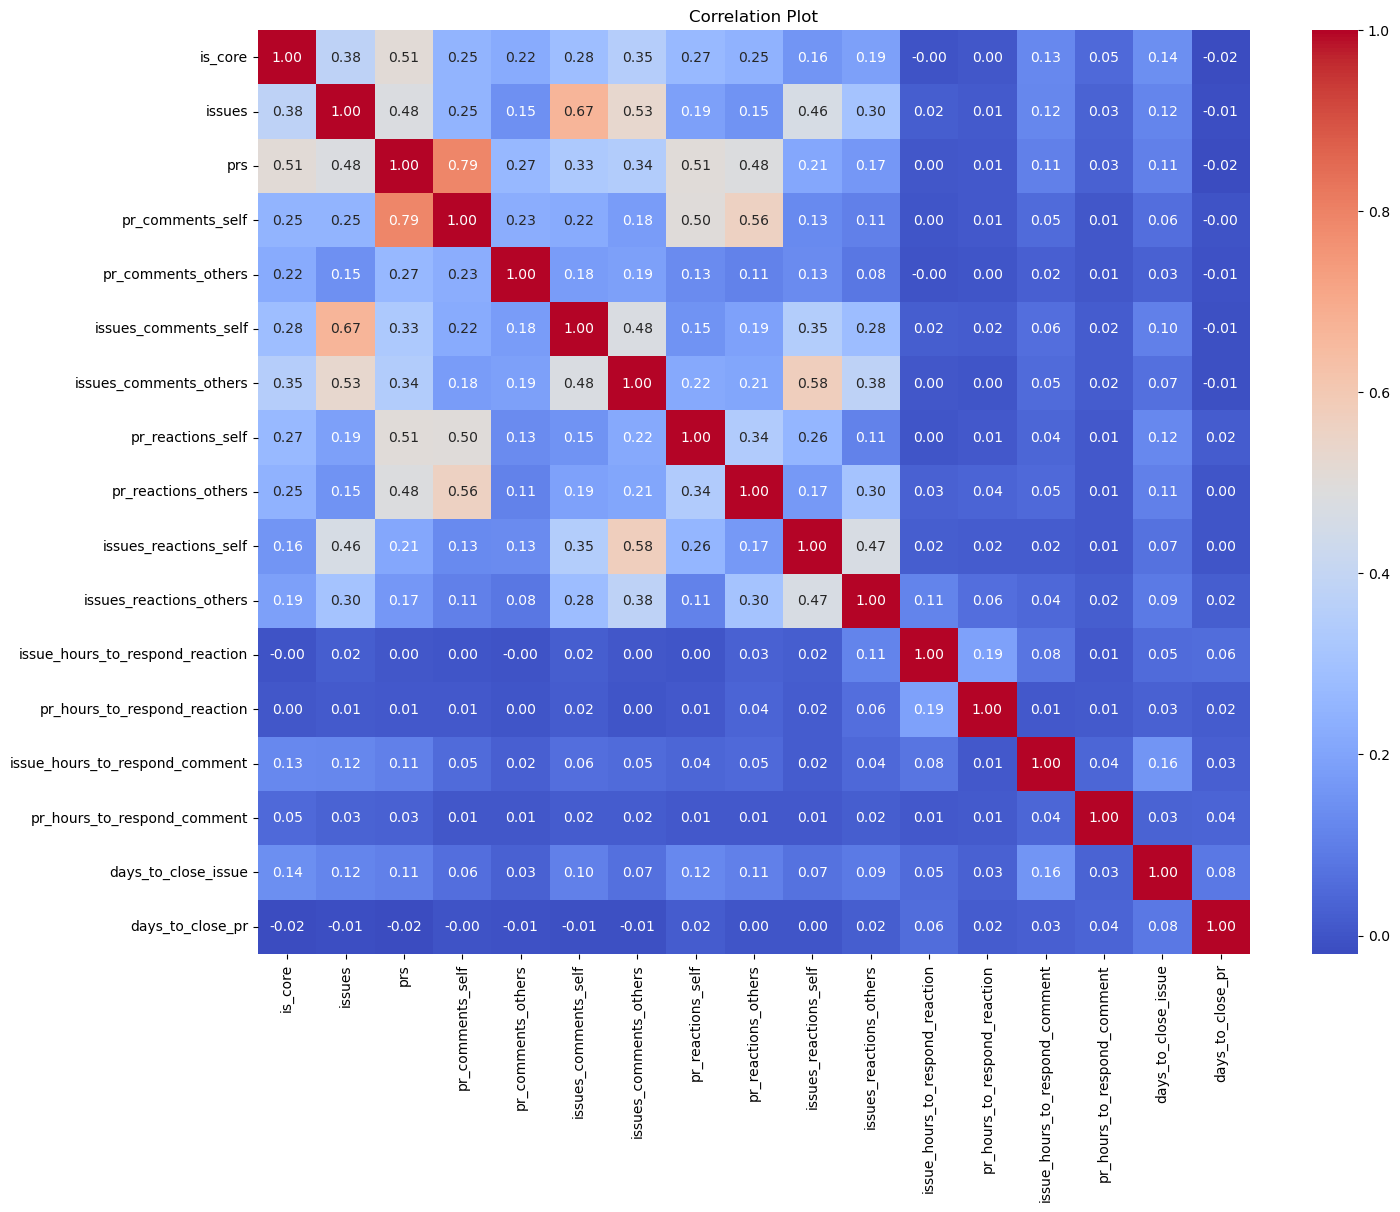

In [6]:
# Creating a correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(c3.corr(), annot=True, cmap='coolwarm', fmt=".2f")

# Adding a title
plt.title('Correlation Plot')

# Displaying the plot
plt.show() 

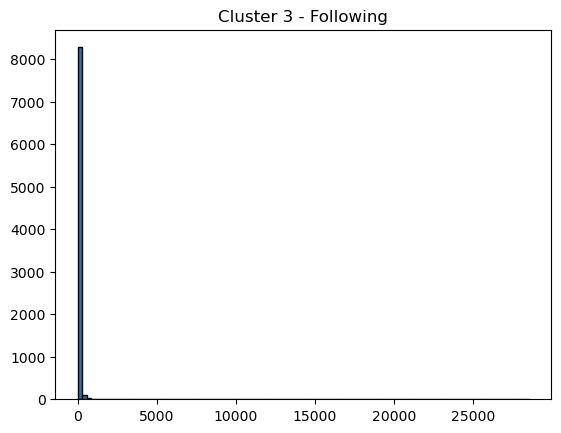

In [7]:
plt.hist(c3.pr_comments_self, bins=100, edgecolor='black')
plt.title('Cluster 3 - Following')
plt.show()

In [8]:
x = c3.drop(columns='is_core')
y = c3['is_core']
x = x.to_numpy()
y = y.to_numpy()

In [9]:
adasyn = imblearn.over_sampling.ADASYN(random_state = 0)
# Fit and transform the data
x_resampled_adasyn, y_resampled_adasyn = adasyn.fit_resample(x,y)
df_resampled_adasyn = pd.DataFrame(data=x_resampled_adasyn, columns=pred_cols)  # Replace column names as needed
df_resampled_adasyn['is_core'] = y_resampled_adasyn  # Assuming 'target' is the name of your target column
df_resampled_adasyn

issues        prs  pr_comments_self  pr_comments_others  \
0       0.000000   1.000000          3.000000            0.000000   
1       1.000000   2.000000          3.000000            1.000000   
2       0.000000   5.000000         17.000000            0.000000   
3       0.000000   3.000000          4.000000            0.000000   
4       3.000000   4.000000          9.000000            2.000000   
...          ...        ...               ...                 ...   
16190  26.731514  89.170173         17.171006           25.756301   
16191  20.674466  71.636612         25.778390           32.132141   
16192  15.792311  59.721271         32.278729           34.010866   
16193  25.316854  78.913224         27.161452           16.167502   
16194  14.625110  53.692645         25.702168           30.884852   

       issues_comments_self  issues_comments_others  pr_reactions_self  \
0                  0.000000                0.000000           0.000000   
1                  2.000000                0.000000           0.000000   
2                  0.000000                0.000000           0.000000   
3                  0.000000                0.000000           0.000000   
4                  1.000000                0.000000           2.000000   
...                     ...                     ...                ...   
16190             20.073110               44.512185           0.975630   
16191             18.160358               44.193393           1.613214   
16192             15.792311               40.945258           1.857919   
16193              6.124114               18.409680           3.919274   
16194             14.807794               46.192206           1.634632   

       pr_reactions_others  issues_reactions_self  issues_reactions_others  \
0                 0.000000               0.000000                 0.000000   
1                 1.000000               0.000000                 0.000000   
2                 0.000000               0.000000                 0.000000   
3                 0.000000               0.000000                 0.000000   
4                 0.000000               2.000000                 5.000000   
...                    ...                    ...                      ...   
16190             2.926890               5.414705                 1.463445   
16191             4.839642               7.646249                 2.419821   
16192             5.573757               8.360635                 2.786878   
16193             2.161452               3.242178                 1.080726   
16194             4.903897               8.269265                 2.451948   

       issue_hours_to_respond_reaction  pr_hours_to_respond_reaction  \
0                             0.000000                      0.000000   
1                             0.000000                      0.242000   
2                             0.000000                      0.000000   
3                             0.000000                      0.000000   
4                          4099.324000                      0.000000   
...                                ...                           ...   
16190                         5.004982                      0.525865   
16191                         8.275788                      0.869522   
16192                         9.531124                      1.001418   
16193                         3.696083                      0.388341   
16194                         8.385663                      0.881067   

       issue_hours_to_respond_comment  pr_hours_to_respond_comment  \
0                            0.000000                     0.000000   
1                            0.000000                    20.260000   
2                            0.000000                     0.000000   
3                            0.000000                     0.000000   
4                            0.000000                    80.227000   
...                               ...                          ...   


In [10]:
smnc = imblearn.over_sampling.SMOTE(random_state=0)
x_resampled_smnc, y_resampled_smnc = smnc.fit_resample(x, y)
df_resampled_smnc = pd.DataFrame(data=x_resampled_smnc, columns=pred_cols)
df_resampled_smnc['is_core'] = y_resampled_smnc
df_resampled_smnc

issues         prs  pr_comments_self  pr_comments_others  \
0       0.000000    1.000000          3.000000            0.000000   
1       1.000000    2.000000          3.000000            1.000000   
2       0.000000    5.000000         17.000000            0.000000   
3       0.000000    3.000000          4.000000            0.000000   
4       3.000000    4.000000          9.000000            2.000000   
...          ...         ...               ...                 ...   
16165  29.564827   21.420102          4.130651          119.693485   
16166  21.680849  165.659557        577.255323           23.595754   
16167   0.000000   82.125307        128.984643           24.859337   
16168   2.206444  108.367741         63.483891           11.425816   
16169   0.000000  307.354333       1628.043482          121.873702   

       issues_comments_self  issues_comments_others  pr_reactions_self  \
0                  0.000000                0.000000           0.000000   
1                  2.000000                0.000000           0.000000   
2                  0.000000                0.000000           0.000000   
3                  0.000000                0.000000           0.000000   
4                  1.000000                0.000000           2.000000   
...                     ...                     ...                ...   
16165            528.211108              109.751774           0.000000   
16166             59.425539               63.553181           5.765957   
16167              0.000000                9.578010           0.421990   
16168             11.399959               78.199877           2.206444   
16169              0.000000                1.288189          18.790236   

       pr_reactions_others  issues_reactions_self  issues_reactions_others  \
0                 0.000000               0.000000                 0.000000   
1                 1.000000               0.000000                 0.000000   
2                 0.000000               0.000000                 0.000000   
3                 0.000000               0.000000                 0.000000   
4                 0.000000               2.000000                 5.000000   
...                    ...                    ...                      ...   
16165             0.000000               0.000000                 0.000000   
16166             3.000000               0.382978                 0.617022   
16167             2.578010               0.000000                 0.859337   
16168             1.103222               0.000000                 1.470962   
16169             0.257638               0.000000                 0.000000   

       issue_hours_to_respond_reaction  pr_hours_to_respond_reaction  \
0                             0.000000                      0.000000   
1                             0.000000                      0.242000   
2                             0.000000                      0.000000   
3                             0.000000                      0.000000   
4                          4099.324000                      0.000000   
...                                ...                           ...   
16165                         0.000000                      0.000000   
16166                        40.735145                     46.765897   
16167                         0.038670                     17.010569   
16168                         6.524822                     16.488018   
16169                         0.000000                      0.525323   

       issue_hours_to_respond_comment  pr_hours_to_respond_comment  \
0                            0.000000                     0.000000   
1                            0.000000                    20.260000   
2                            0.000000                     0.000000   
3                            0.000000                     0.000000   
4                            0.000000                    80.227000   
...                               ...                     

In [17]:
border = imblearn.over_sampling.BorderlineSMOTE(random_state=0)
x_resampled_border, y_resampled_border = border.fit_resample(x, y)
df_resampled_border = pd.DataFrame(data=x_resampled_border, columns=pred_cols)
df_resampled_border['is_core'] = y_resampled_border
df_resampled_border

issues         prs  pr_comments_self  pr_comments_others  \
0        0.000000    1.000000          3.000000            0.000000   
1        1.000000    2.000000          3.000000            1.000000   
2        0.000000    5.000000         17.000000            0.000000   
3        0.000000    3.000000          4.000000            0.000000   
4        3.000000    4.000000          9.000000            2.000000   
...           ...         ...               ...                 ...   
16165    1.676869  144.056181         26.619141            0.161565   
16166  128.395300  263.738469        366.377982           40.494257   
16167   33.003480  107.325863          8.258212           19.154231   
16168   15.758748  134.859153         10.873923            1.000000   
16169    0.919636   92.955270        161.106901           11.205458   

       issues_comments_self  issues_comments_others  pr_reactions_self  \
0                  0.000000                0.000000           0.000000   
1                  2.000000                0.000000           0.000000   
2                  0.000000                0.000000           0.000000   
3                  0.000000                0.000000           0.000000   
4                  1.000000                0.000000           2.000000   
...                     ...                     ...                ...   
16165              0.838435                2.515304           0.838435   
16166             76.459269               27.406962           4.825588   
16167             22.053731               44.842288           0.315423   
16168             17.382099               12.994549           3.539300   
16169              0.919636                1.723275           0.919636   

       pr_reactions_others  issues_reactions_self  issues_reactions_others  \
0                 0.000000               0.000000                 0.000000   
1                 1.000000               0.000000                 0.000000   
2                 0.000000               0.000000                 0.000000   
3                 0.000000               0.000000                 0.000000   
4                 0.000000               2.000000                 5.000000   
...                    ...                    ...                      ...   
16165             0.000000               0.000000                 0.000000   
16166             4.238381               1.000000                 0.470931   
16167             0.946269               3.103981                 0.473135   
16168             0.000000               2.654475                 0.000000   
16169             3.919636               0.000000                 0.080364   

       issue_hours_to_respond_reaction  pr_hours_to_respond_reaction  \
0                             0.000000                      0.000000   
1                             0.000000                      0.242000   
2                             0.000000                      0.000000   
3                             0.000000                      0.000000   
4                          4099.324000                      0.000000   
...                                ...                           ...   
16165                         0.000000                      0.000000   
16166                         0.498716                     24.797356   
16167                         1.618121                      0.170013   
16168                         0.000000                      0.000000   
16169                         0.003616                      3.055783   

       issue_hours_to_respond_comment  pr_hours_to_respond_comment  \
0                            0.000000                     0.000000   
1                            0.000000                    20.260000   
2                            0.000000                     0.000000   
3                            0.000000                     0.000000   
4                            0.000000                    80.227000   
...                               ...          

In [12]:
print(c3['is_core'].value_counts())
print(df_resampled_adasyn['is_core'].value_counts())

0    8085
1     359
Name: is_core, dtype: int64
1    8110
0    8085
Name: is_core, dtype: int64


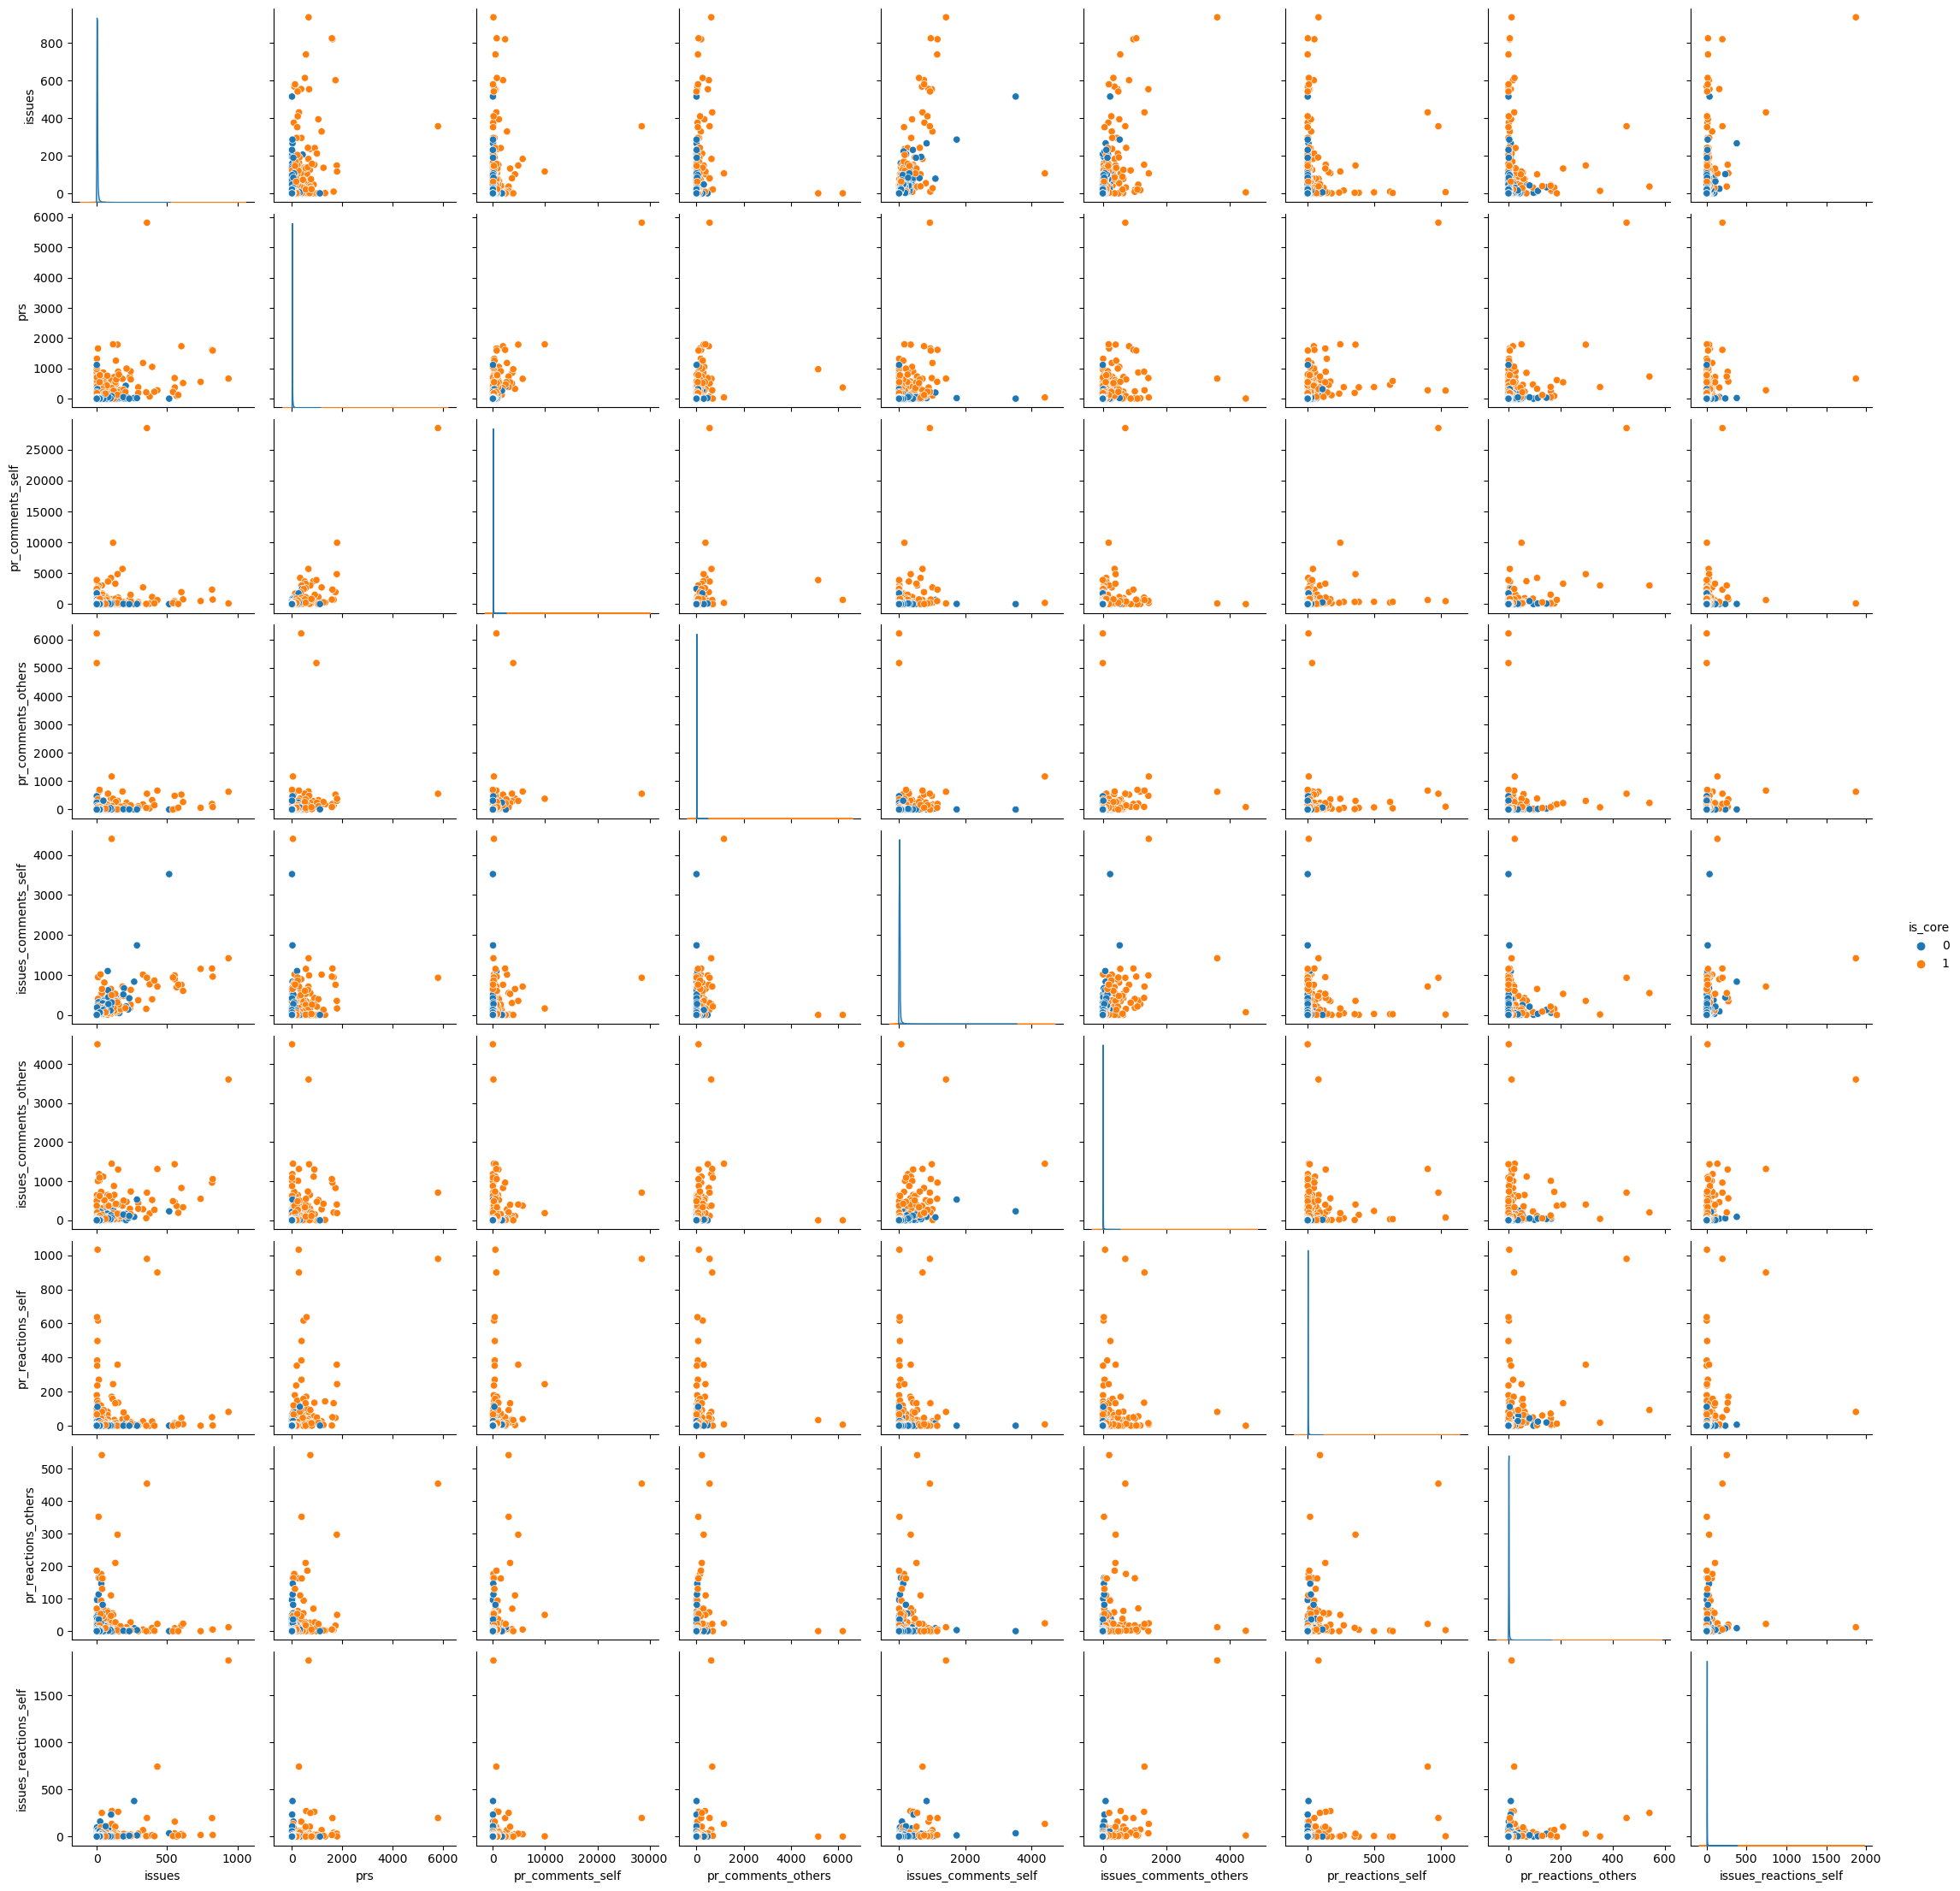

In [13]:
sns.pairplot(c3.iloc[:,:10], hue = 'is_core')

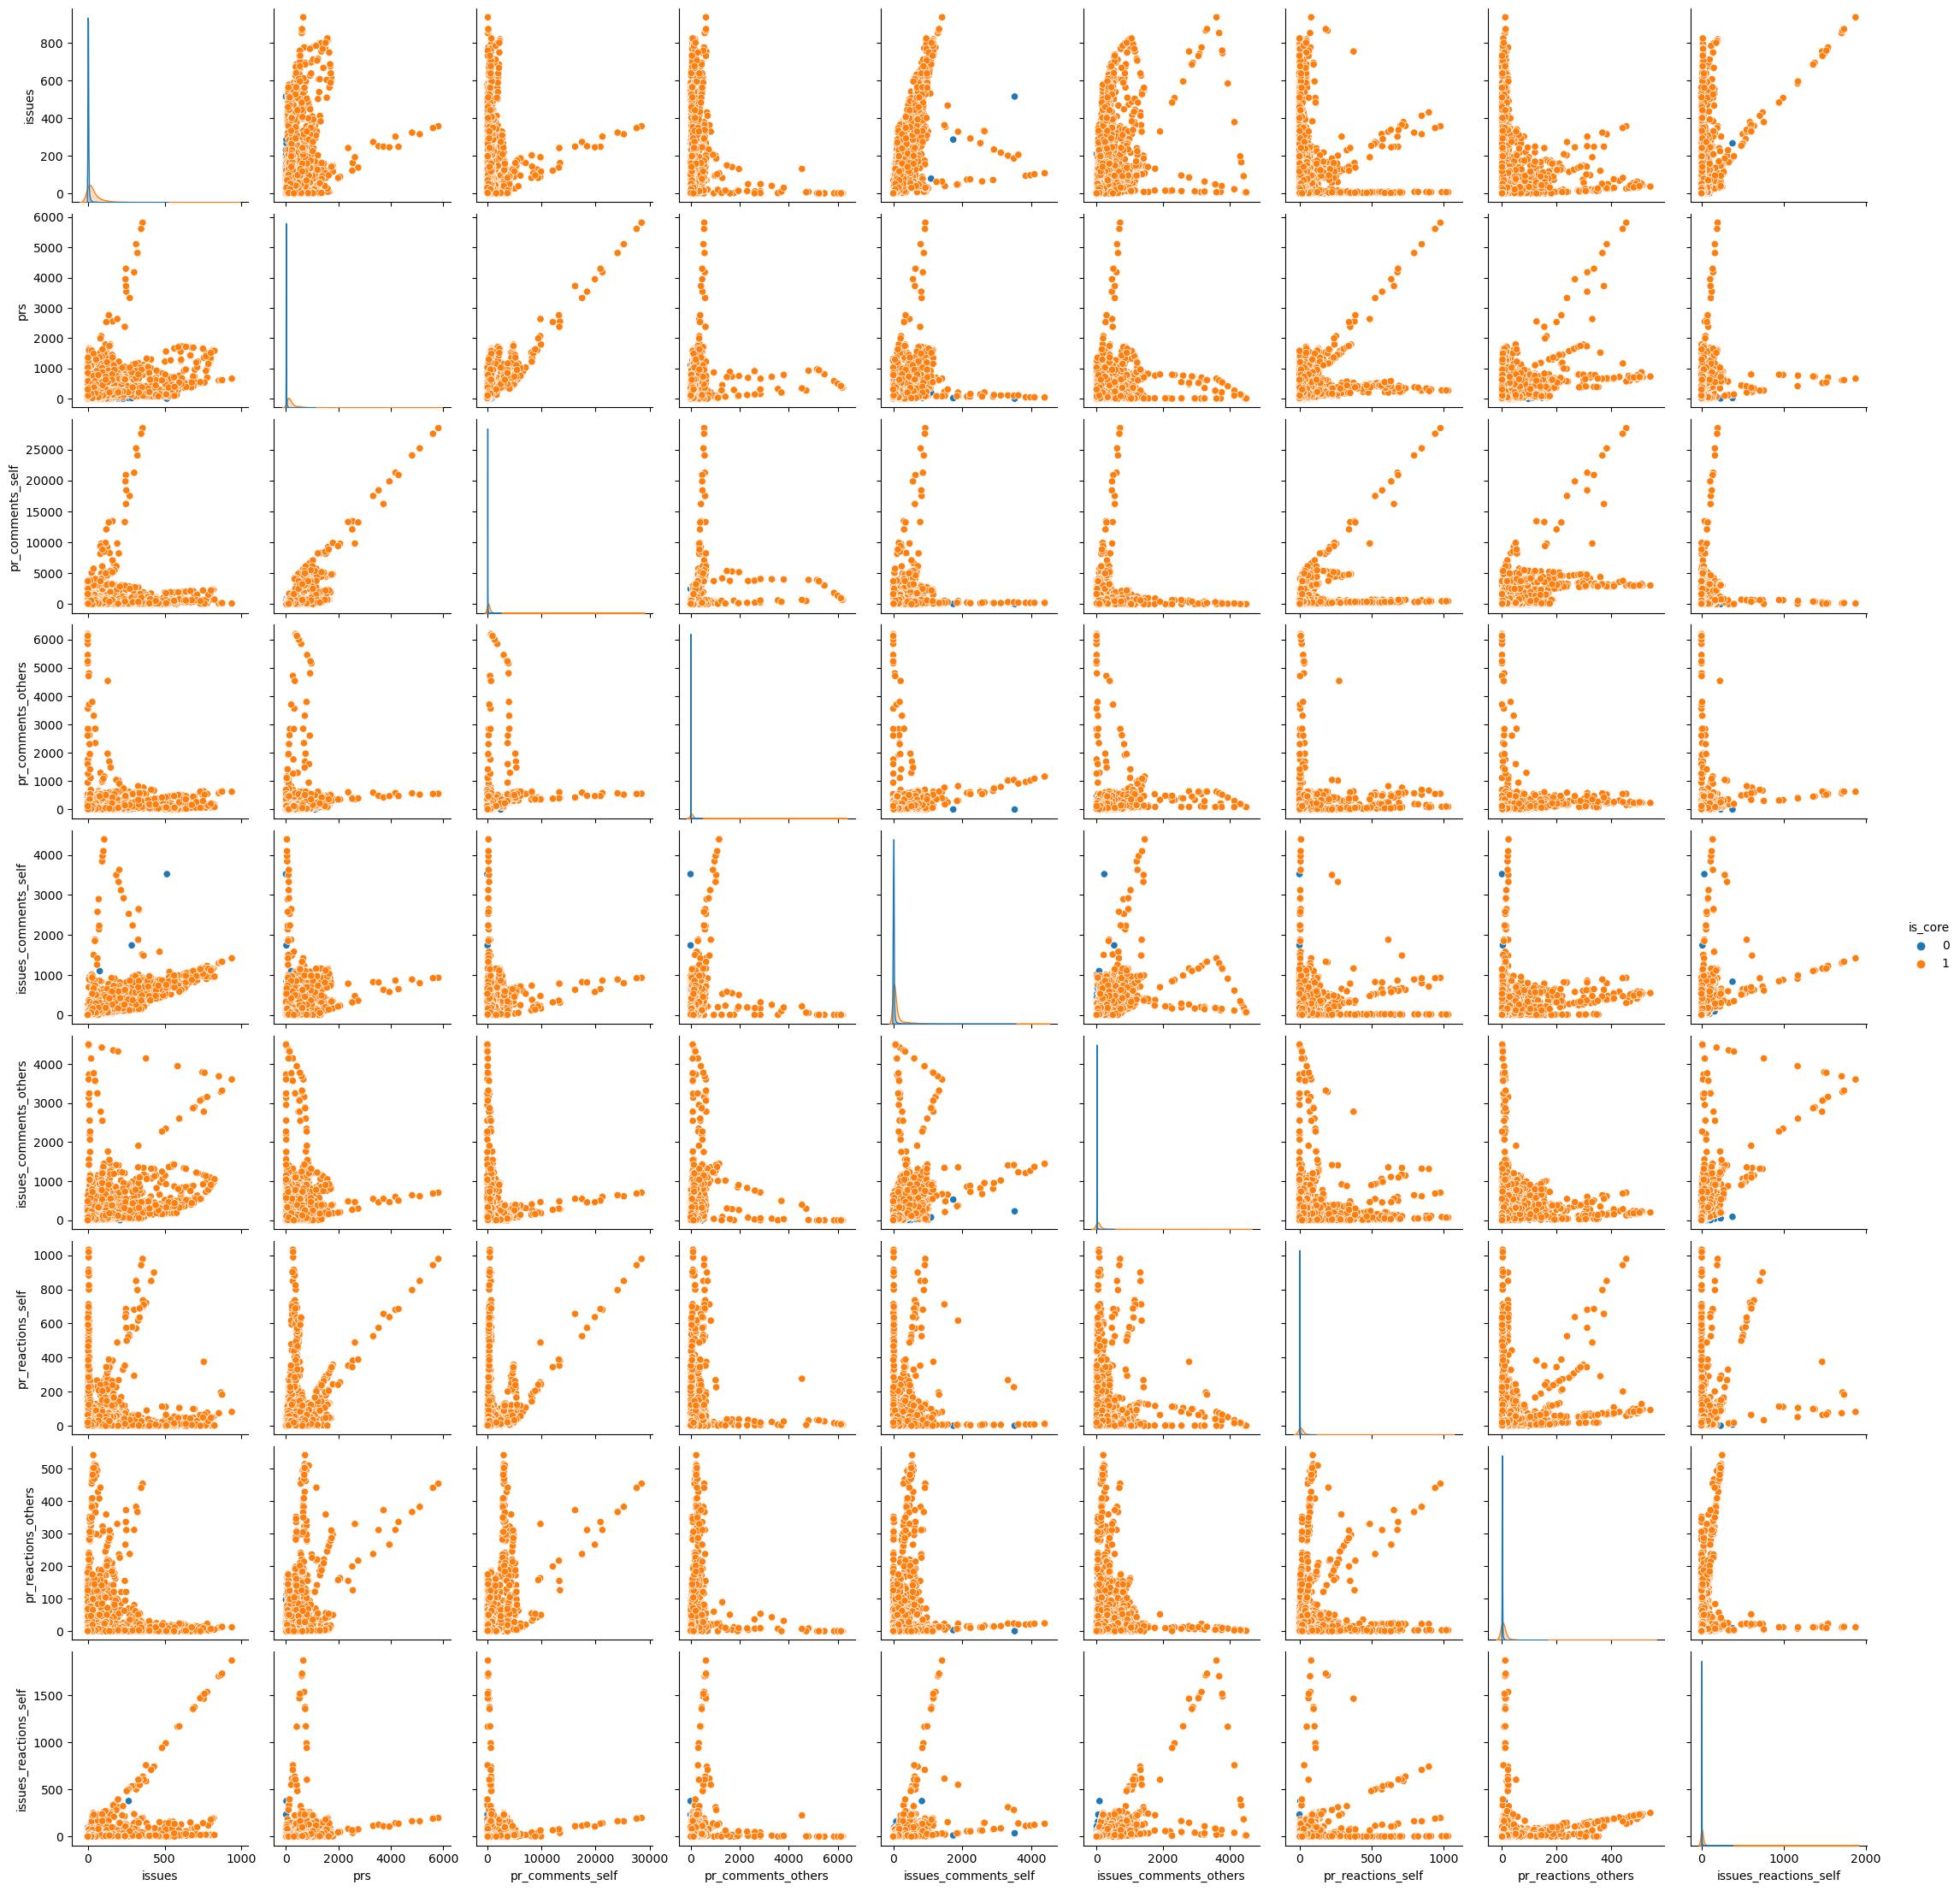

In [21]:
# Specify the subset of columns including 'is_core'
columns_subset = df_resampled_adasyn.columns[:9].tolist() + ['is_core']
columns_subset
# Create pairplot with 'is_core' as hue
sns.pairplot(df_resampled_adasyn[columns_subset], hue='is_core')

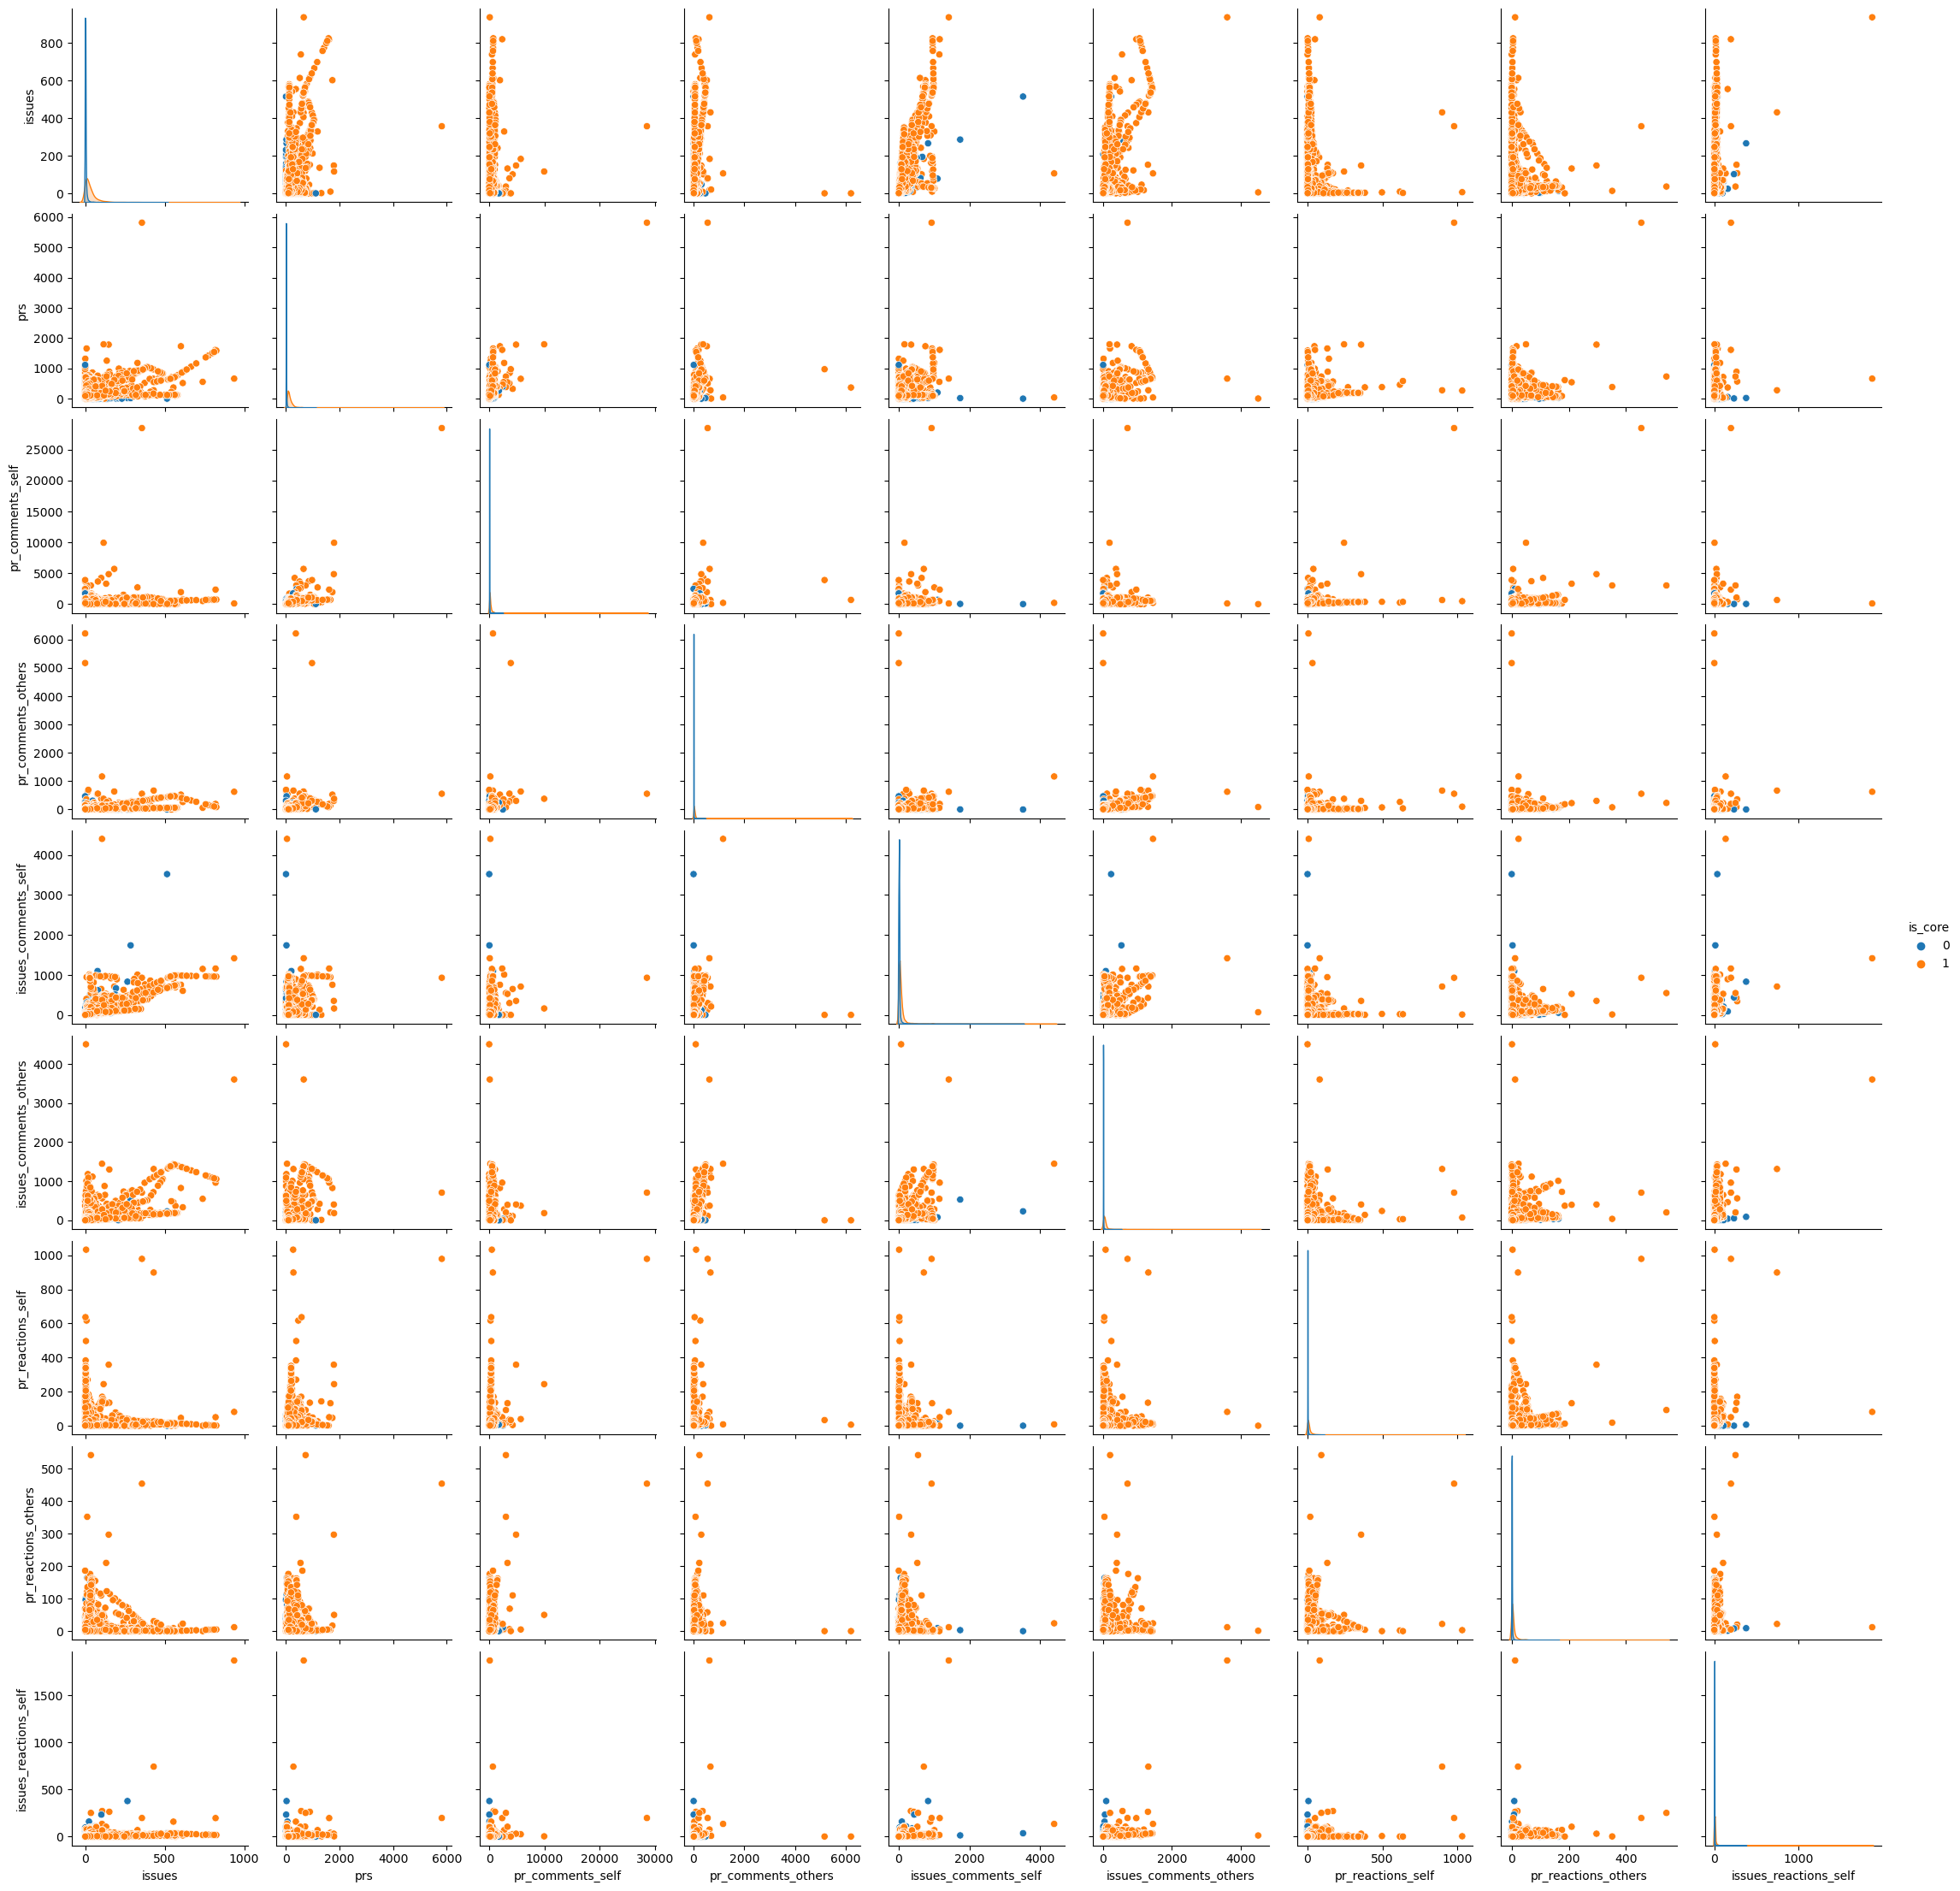

In [23]:
# Specify the subset of columns including 'is_core'
columns_subset = df_resampled_smnc.columns[:9].tolist() + ['is_core']
columns_subset
# Create pairplot with 'is_core' as hue
sns.pairplot(df_resampled_smnc[columns_subset], hue='is_core')

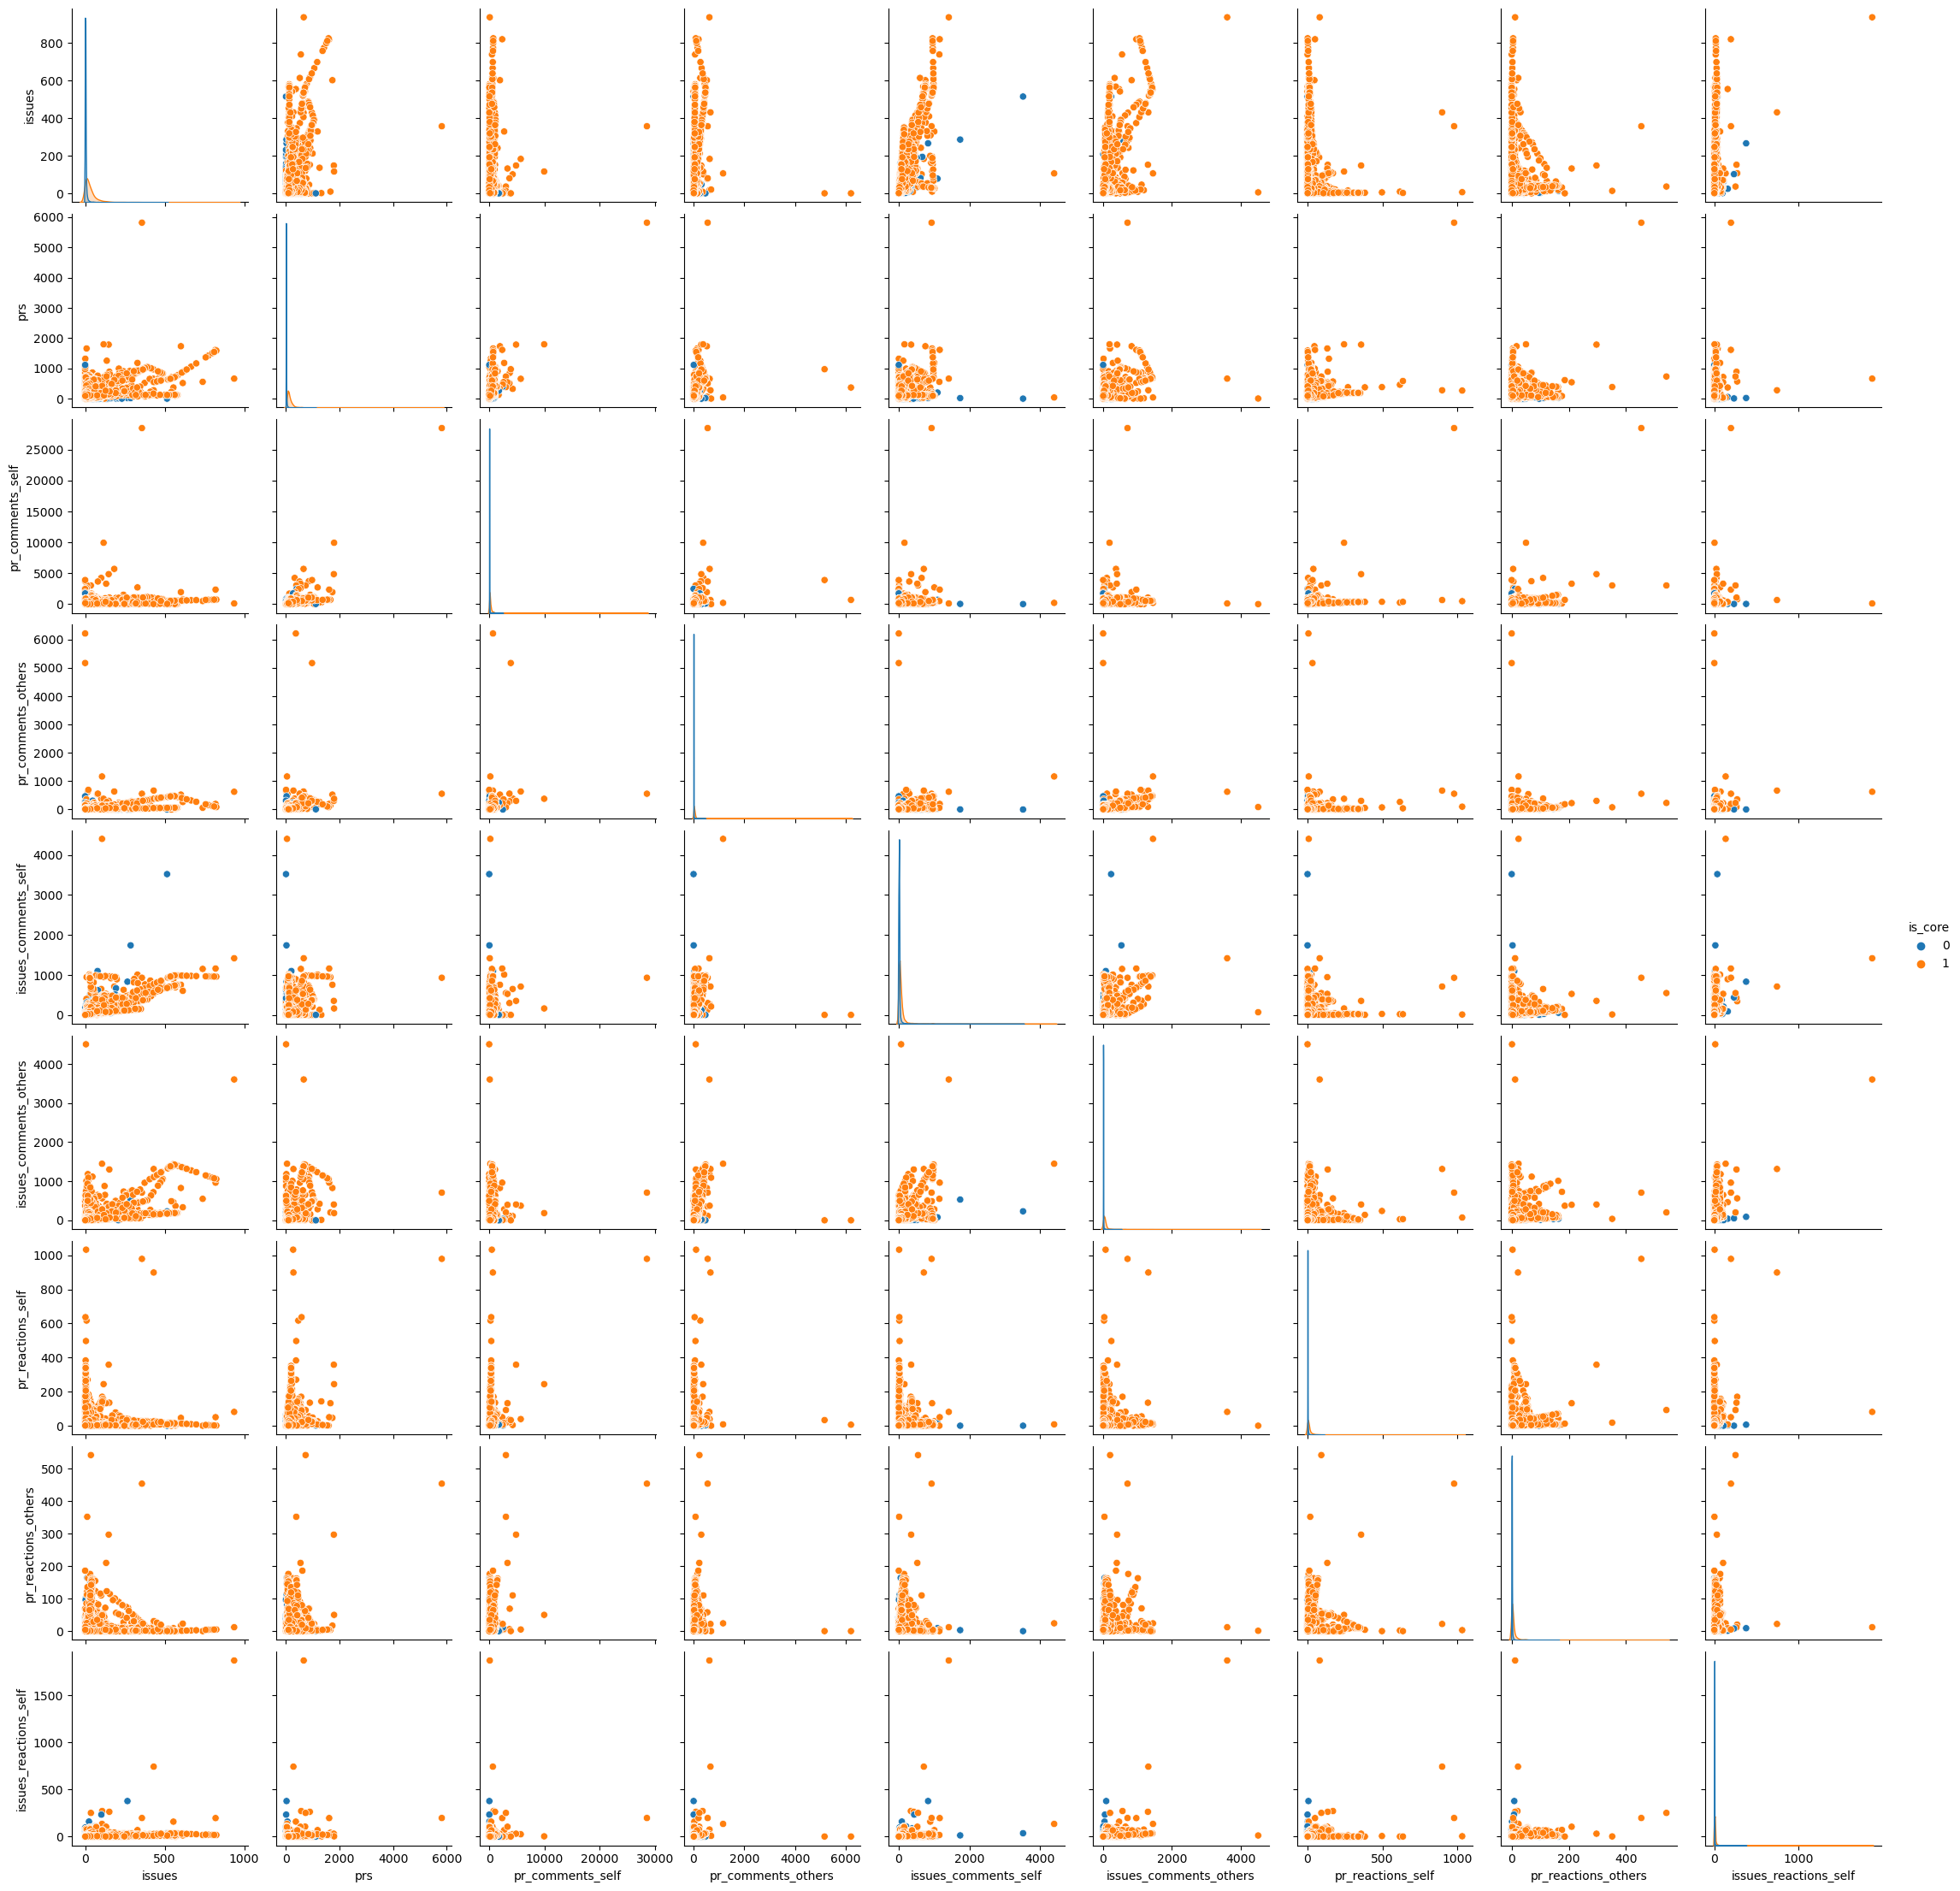

In [24]:
# Specify the subset of columns including 'is_core'
columns_subset = df_resampled_border.columns[:9].tolist() + ['is_core']
columns_subset
# Create pairplot with 'is_core' as hue
sns.pairplot(df_resampled_border[columns_subset], hue='is_core')

In [ ]:
df_resampled_adasyn.columns

In [ ]:
df_resampled_adasyn['is_core'].unique()

In [ ]:
sns.pairplot(df_resampled_adasyn, hue = 'is_core')

In [ ]:
sns.pairplot(df_resampled_smnc, hue = 'is_core')

In [ ]:
sns.pairplot(df_resampled_border, hue = 'is_core')

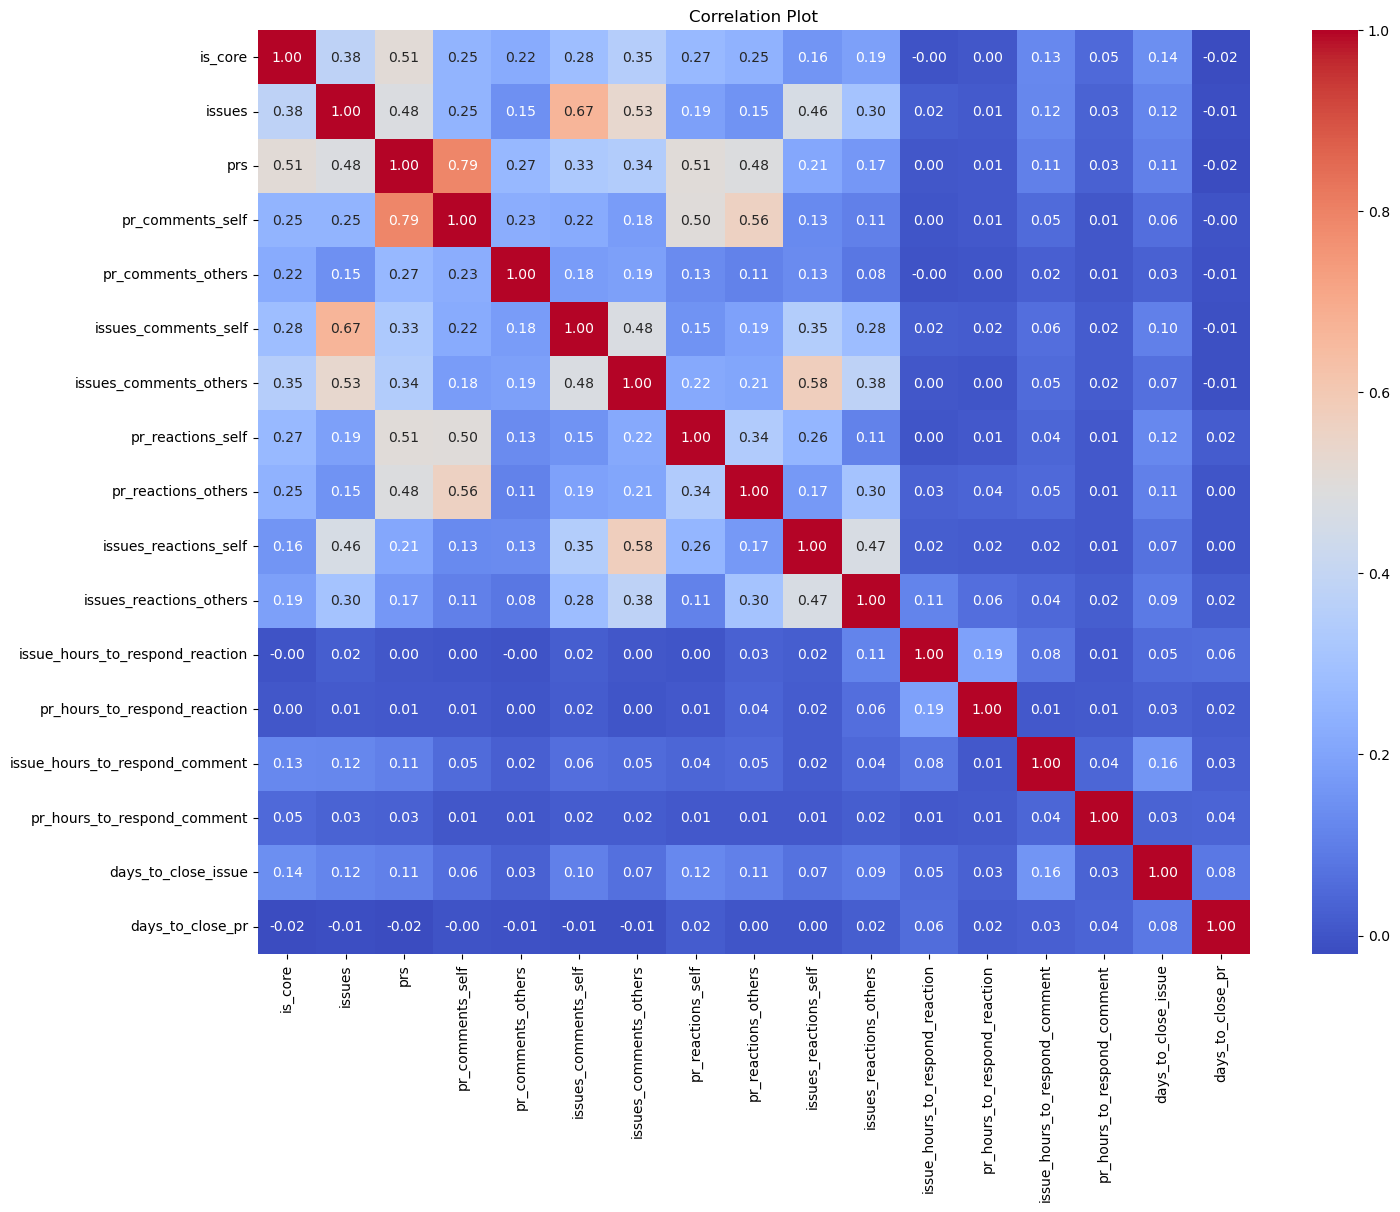

In [32]:
# Creating a correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(c3.corr(), annot=True, cmap='coolwarm', fmt=".2f")

# Adding a title
plt.title('Correlation Plot')

# Displaying the plot
plt.show()

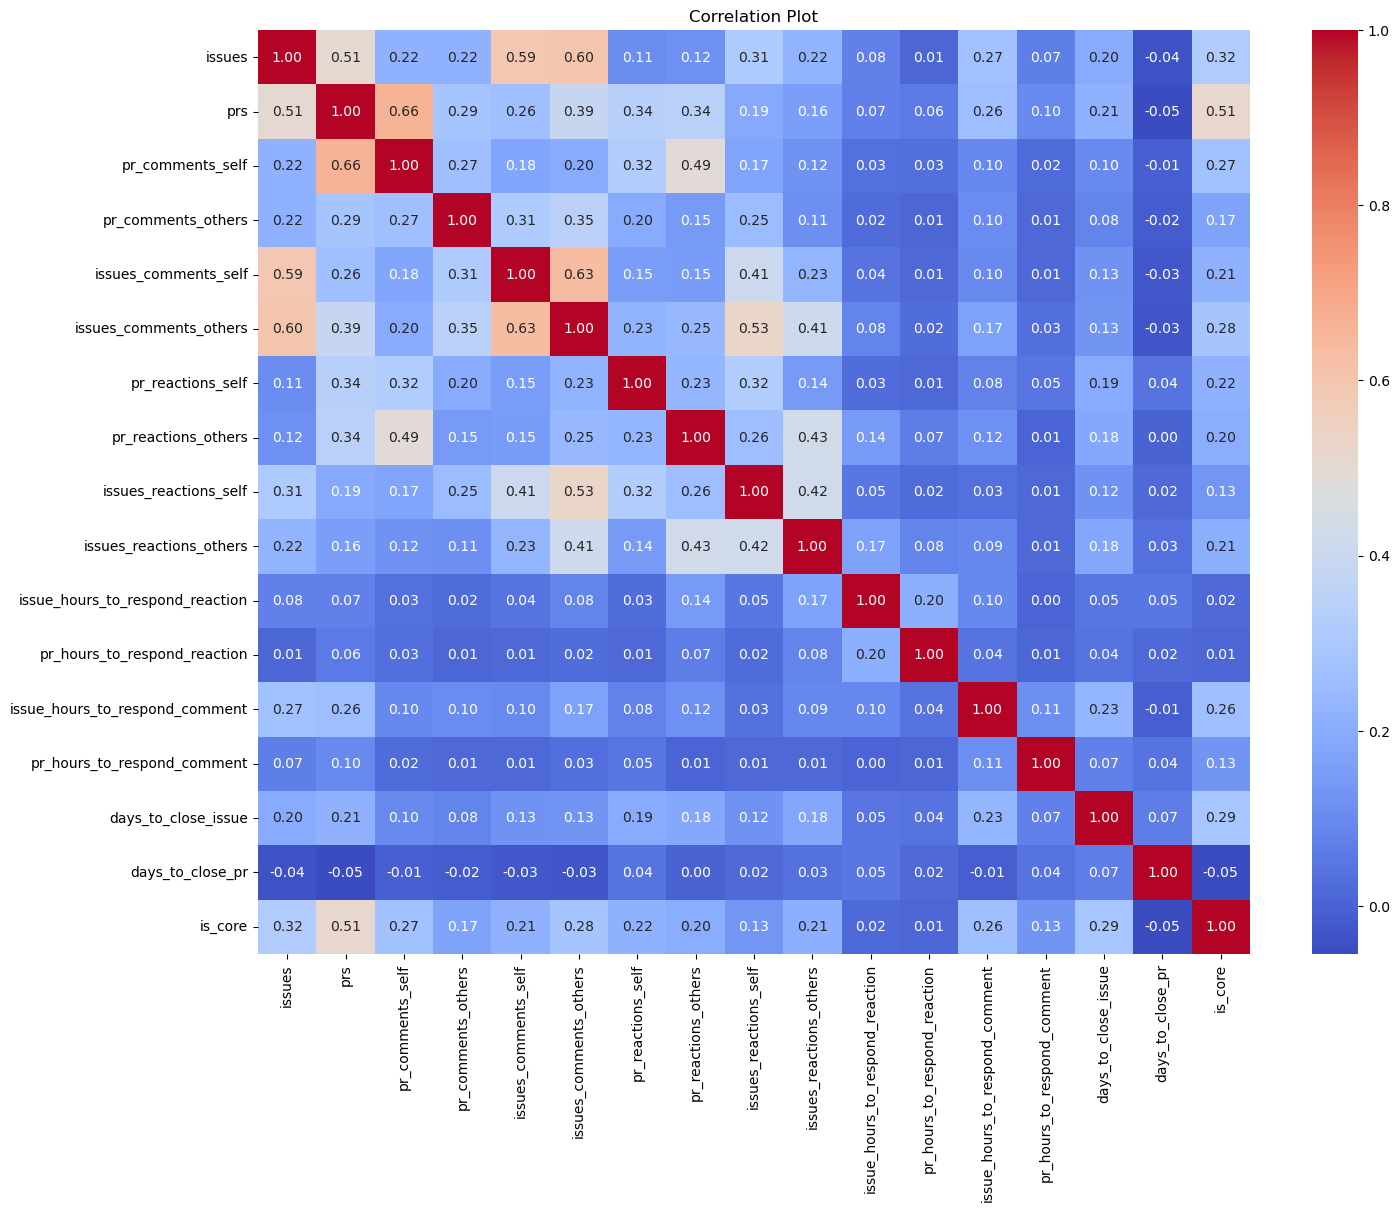

In [31]:
# Creating a correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(df_resampled_adasyn.corr(), annot=True, cmap='coolwarm', fmt=".2f")

# Adding a title
plt.title('Correlation Plot')

# Displaying the plot
plt.show()

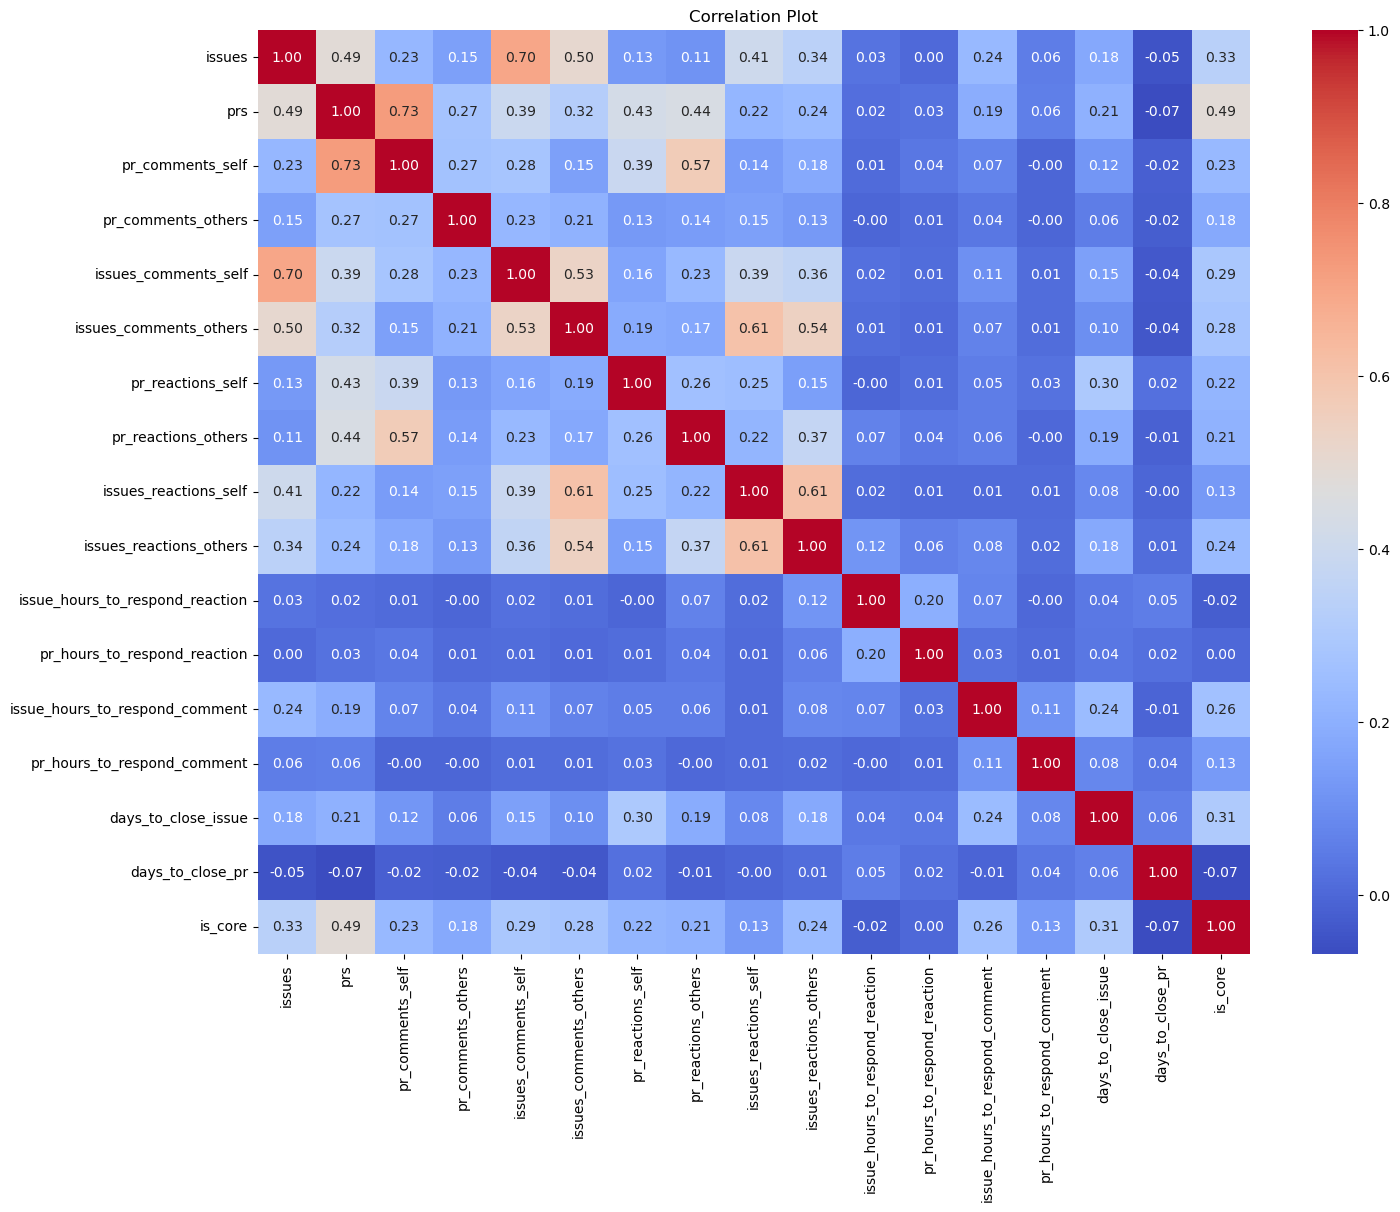

In [37]:
# Creating a correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(df_resampled_smnc.corr(), annot=True, cmap='coolwarm', fmt=".2f")

# Adding a title
plt.title('Correlation Plot')

# Displaying the plot
plt.show()

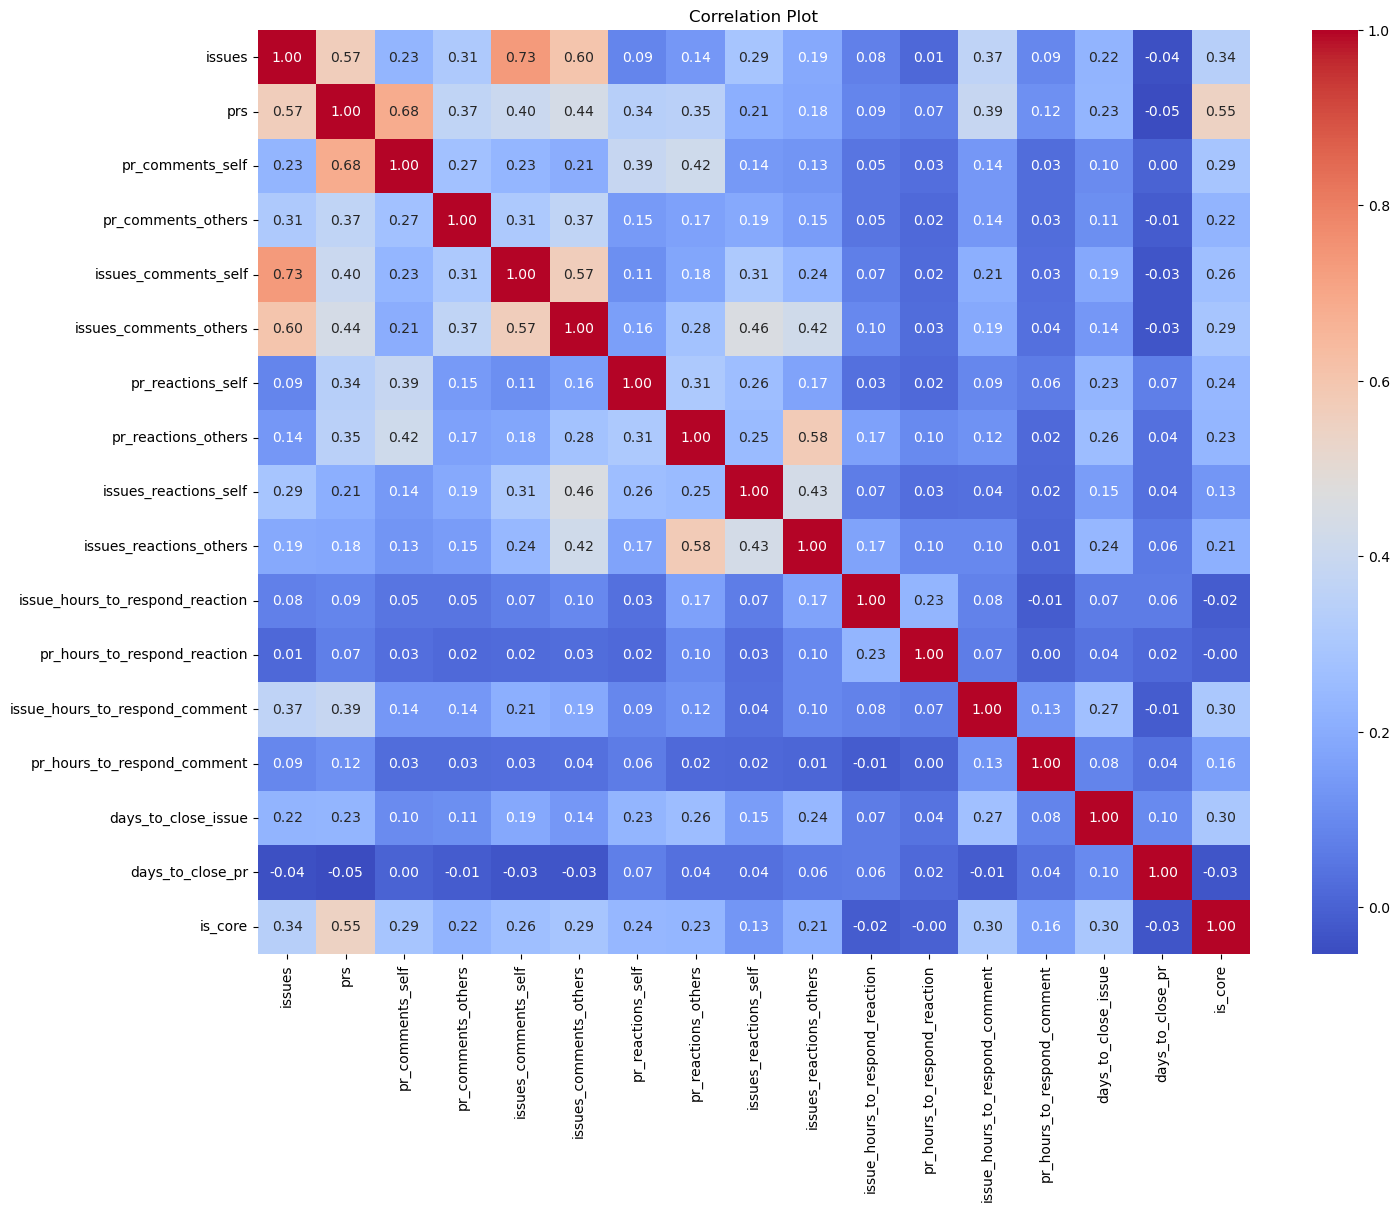

In [38]:
# Creating a correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(df_resampled_border.corr(), annot=True, cmap='coolwarm', fmt=".2f")

# Adding a title
plt.title('Correlation Plot')

# Displaying the plot
plt.show()

In [39]:
ks_adasyn = []
p_adasyn = []
ks_smnc = []
p_smnc =[]
ks_border = []
p_border = []
for i in range(15):
    x = c3.iloc[:, i+1]
    y1 = df_resampled_adasyn.iloc[:,i]
    y2 = df_resampled_smnc.iloc[:,i]
    y3 = df_resampled_border.iloc[:,i]
    
    ks_stat1, ks_pvalue1 = ks_2samp(x, y1)
    ks_stat2, ks_pvalue2 = ks_2samp(x, y2)
    ks_stat3, ks_pvalue3 = ks_2samp(x, y3)
    
    ks_adasyn.append(ks_stat1)
    ks_smnc.append(ks_stat2)
    ks_border.append(ks_stat3)
    
    p_adasyn.append(ks_pvalue1)
    p_smnc.append(ks_pvalue2)
    p_border.append(ks_pvalue3)

In [40]:
for i in range(len(p_adasyn)):
    print(p_border[i] < 0.05)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [41]:
for i in range(len(p_smnc)):
    print(p_border[i] < 0.05)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [42]:
for i in range(len(p_border)):
    print(p_border[i] < 0.05)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [43]:
for i in range(len(ks_adasyn)):
    cur = [ks_adasyn[i], ks_smnc[i], ks_border[i]]
    print(cur.index(min(cur)))

0
0
0
0
0
0
0
2
0
0
0
2
0
0
0
